In [79]:
# AJUSTAR LA DATA PARA QUE DE RESULTADOS!!!!

In [24]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

In [25]:
# Multiple linear Regression

In [26]:
from sklearn.datasets import make_regression

In [27]:
df = pd.read_csv('Resources/data3_test.csv',parse_dates =["Booking_year_month"])
df.head()

,Unnamed: 0,Booking_year_month,DOB_month,total_crime,age<25_1,age26-50_1,age>50_1,day_of_week_Monday_1,day_of_week_Tuesday_1,day_of_week_Wednesday_1,...,day_of_week_Friday_1,day_of_week_Saturday_1,day_of_week_Sunday_1,summer_1,spring_1,winter_1,autum_1,CityRN_FOREIGN_1,CityRN_HOMELESS_1,CityRN_MIAMI_1
0,3,2015-08-01,1013,142,18,92,32,14,13,29,...,23,21,14,142,0,0,0,13,52,77
1,4,2015-09-01,803,153,15,112,26,24,17,20,...,18,22,32,153,0,0,0,14,43,96
2,5,2015-10-01,1057,121,11,84,26,13,22,23,...,13,10,16,121,0,0,0,11,44,66
3,6,2015-11-01,774,156,16,92,48,13,16,21,...,18,26,23,0,0,0,156,10,46,100
4,7,2015-12-01,891,114,4,81,29,18,18,25,...,13,17,8,0,0,0,114,5,42,67


In [28]:
# Drop innecesary columns
df.drop(['Unnamed: 0'], axis=1, inplace=True)
df['total_crime']= df['total_crime'].astype(float)

In [29]:
# Assign X (data) and y (target)

### BEGIN SOLUTION ### also test the relation with CityRN_HOMELESS_1
X = df[['age26-50_1']].values.reshape(-1, 1)
y = df['total_crime'].values.reshape(-1, 1)
print(X.shape, y.shape)
### END SOLUTION

(47, 1) (47, 1)


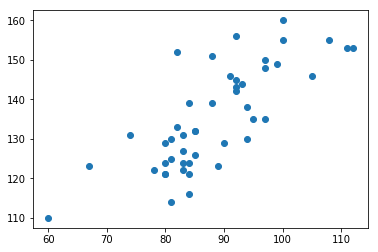

In [30]:
plt.scatter(X,y)

In [31]:
# Split the data into training and testing

### BEGIN SOLUTION
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)
### END SOLUTION

In [32]:
from sklearn.preprocessing import StandardScaler

# Create a StandardScater model and fit it to the training data

### BEGIN SOLUTION
X_scaler = StandardScaler().fit(X_train)
y_scaler = StandardScaler().fit(y_train)
### END SOLUTION

In [33]:
# Transform the training and testing data using the X_scaler and y_scaler models

### BEGIN SOLUTION
X_train_scaled = X_scaler.transform(X_train)
X_test_scaled = X_scaler.transform(X_test)
y_train_scaled = y_scaler.transform(y_train)
y_test_scaled = y_scaler.transform(y_test)
### END SOLUTION

In [34]:
# Create a LinearRegression model and fit it to the scaled training data

### BEGIN SOLUTION
from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(X_train_scaled, y_train_scaled)
### END SOLUTION

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

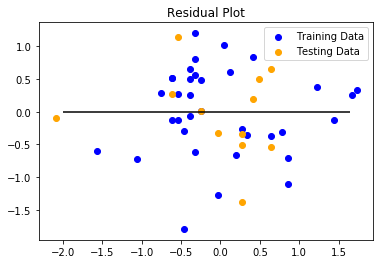

In [35]:
# Make predictions using the X_test_scaled data
# Plot y_test_scaled vs y_test_scaled
# Scatter plot y_test_scaled vs predictions

### BEGIN SOLUTION
predictions = model.predict(X_test_scaled)
model.fit(X_train_scaled, y_train_scaled)
plt.scatter(model.predict(X_train_scaled), model.predict(X_train_scaled) - y_train_scaled, c="blue", label="Training Data")
plt.scatter(model.predict(X_test_scaled), model.predict(X_test_scaled) - y_test_scaled, c="orange", label="Testing Data")
plt.legend()
plt.hlines(y=0, xmin=y_test_scaled.min(), xmax=y_test_scaled.max())
plt.title("Residual Plot")
plt.show()
### END SOLUTION

In [36]:
# Used X_test_scaled, y_test_scaled, and model.predict(X_test_scaled) to calculate MSE and R2

### BEGIN SOLUTION
from sklearn.metrics import mean_squared_error

MSE = mean_squared_error(y_test_scaled, predictions)
r2 = model.score(X_test_scaled, y_test_scaled)
### END SOLUTION

print(f"MSE: {MSE}, R2: {r2}")

MSE: 0.39601165678971934, R2: 0.629388108094885


In [37]:
# LASSO model
# Note: Use an alpha of .01 when creating the model for this activity
from sklearn.linear_model import Lasso

### BEGIN SOLUTION
lasso = Lasso(alpha=.01).fit(X_train_scaled, y_train_scaled)

predictions = lasso.predict(X_test_scaled)

MSE = mean_squared_error(y_test_scaled, predictions)
r2 = lasso.score(X_test_scaled, y_test_scaled)
### END SOLUTION

print(f"MSE: {MSE}, R2: {r2}")

MSE: 0.3978467855328285, R2: 0.6276706825501761


In [38]:
# Ridge model
# Note: Use an alpha of .01 when creating the model for this activity
from sklearn.linear_model import Ridge

### BEGIN SOLUTION
ridge = Ridge(alpha=.01).fit(X_train_scaled, y_train_scaled)

predictions = ridge.predict(X_test_scaled)

MSE = mean_squared_error(y_test_scaled, predictions)
r2 = ridge.score(X_test_scaled, y_test_scaled)
### END SOLUTION

print(f"MSE: {MSE}, R2: {r2}")

MSE: 0.39604898766287927, R2: 0.6293531715840751


In [39]:
# ElasticNet model
# Note: Use an alpha of .01 when creating the model for this activity
from sklearn.linear_model import ElasticNet

### BEGIN SOLUTION
elasticnet = ElasticNet(alpha=.01).fit(X_train_scaled, y_train_scaled)

predictions = elasticnet.predict(X_test_scaled)

MSE = mean_squared_error(y_test_scaled, predictions)
r2 = elasticnet.score(X_test_scaled, y_test_scaled)
### END SOLUTION

print(f"MSE: {MSE}, R2: {r2}")

MSE: 0.39759923024943783, R2: 0.62790235990198


In [ ]:
# -----------------------------------------------------------------------------@

In [48]:
from sklearn import preprocessing
from sklearn import ensemble
from sklearn.metrics import accuracy_score

# Returns fitted Gradient Boosting Regression model for the training data
def reg_gbr(X_train,Y_train):
    regr = ensemble.GradientBoostingRegressor()
    regr.fit(X_train, Y_train)
    return regr

# Given X and Y data corresponding to a type of crime, divide the data into training
# and test sets 85%/15% split, train the regression model, and predict the test data.
# Then, plot the accuracy (sorted for easier analysis) with the r^2 value
def run_regression(X,Y, plot_num, plot_name):
    scaler = preprocessing.MinMaxScaler(feature_range=(0.0, 1.0))
    X_scaled = scaler.fit_transform(X)
    Y_scaled = np.array(Y)

    numTrain = int(len(X_scaled) *.85)

    X_train = X_scaled[:numTrain]
    Y_train = Y_scaled[:numTrain]
    X_test, Y_test = zip(*sorted(zip(X_scaled[numTrain:],Y_scaled[numTrain:]), key=lambda x:x[1]))

    model_gbr = reg_gbr(X_train, Y_train)
    model_gbr_y = model_gbr.predict(X_test)
    
    r2 = metrics.r2_score(Y_test, model_gbr_y)
    
    plt.subplot(2,2,plot_num)
    plt.plot(Y_test)
    plt.plot(model_gbr_y)
    plt.axis('off')
    plt.title(plot_name + ": (r^2 value: %.2f)" % r2)
    plt.legend(['truth', 'prediction'], loc='upper left', prop={'size':7})

In [49]:
all_data_values = df.reindex(np.random.permutation(df.index))
# X = all_data_values.drop(['Theft','Crime Per 100 Persons','#Agr. Assault (2010)','#Drug Violations (2010)'], axis=1)

plt.figure(figsize=(8,5))

Y = df['CityRN_HOMELESS_1']
run_regression(X,Y,1, 'CityRN_HOMELESS_1')

# Y = all_data_values['#Agr. Assault (2010)'] / all_data_values['Pop. 2010'] * 100
# run_regression(X,Y,2, 'Agr. Assault')

# Y = all_data_values['#Drug Violations (2010)'] / all_data_values['Pop. 2010'] * 100
# run_regression(X,Y,3, 'Drug Violations')

# Y = all_data_values['Crime Per 100 Persons']
# run_regression(X,Y,4, 'Overall Crime')

# plt.tight_layout()

NameError: name 'metrics' is not defined

<Figure size 576x360 with 0 Axes>